<a href="https://colab.research.google.com/github/Shahidulla-Vantela/Customer_Lifetime_Value/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Try to open the file in binary mode to inspect its contents
with open("/content/Copy of Groceries_dataset HP.xlsx", "rb") as f:
    file_content = f.read(100)  # Read the first 100 bytes

print(file_content)

b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x9a\x14\xe4X\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?'


In [ ]:
df = pd.read_excel("/content/Copy of Groceries_dataset HP.xlsx")

In [ ]:
df.head()

,DATE,CUS-ID,CUS-NAME,reviews,RATINGS
0,2024-05-21,1808.0,AAA,The produce is always fresh and well-stocked.,4.5
1,2024-05-21,2552.0,MMM,Love the friendly and helpful staff here.,3.0
2,2024-05-21,2300.0,UUU,Prices are competitive and reasonable.,4.0
3,2024-05-21,1187.0,VVV,The store layout is easy to navigate.,3.0
4,2024-05-21,3037.0,MMM,Appreciate the wide selection of organic produ...,4.5


above output tells us that we have 5 columns in primary sheet of excel file.

In [ ]:
xlsx = pd.ExcelFile("/content/Copy of Groceries_dataset HP.xlsx")

In [ ]:
xlsx.sheet_names

['Groceries_dataset (Recovered)', 'Sheet2', 'Sheet1']

I haved used sheet_names library to retrieve sheet names of the excel file.

In [ ]:
df2 = pd.read_excel("/content/Copy of Groceries_dataset HP.xlsx", sheet_name="Sheet2")

In [ ]:
df3 = pd.read_excel("/content/Copy of Groceries_dataset HP.xlsx", sheet_name="Sheet1")

Using the other sheet names, I have created dataframes namely df2, df3.

In [ ]:
print(df.shape)
print(df2.shape)
print(df3.shape)

(399, 5)
(29, 5)
(399, 16383)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      398 non-null    datetime64[ns]
 1   CUS-ID    398 non-null    float64       
 2   CUS-NAME  339 non-null    object        
 3   reviews   399 non-null    object        
 4   RATINGS   389 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 15.7+ KB


we have 3 numerical data and 2 categorical data variables. I have created copy of this df to perform operations.

In [ ]:
copy_df = df.copy()

In [ ]:
copy_df.isnull().sum()

DATE         1
CUS-ID       1
CUS-NAME    60
reviews      0
RATINGS     10
dtype: int64

In [ ]:
copy_df.dropna(subset=['DATE','CUS-ID','RATINGS'],axis=0, inplace=True)

this is how I have handled numerical data.

In [ ]:
copy_df['CUS-NAME'].fillna('Unknown', axis=0, inplace=True)

This is how I have handled categorical data.

In [ ]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 388
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      388 non-null    datetime64[ns]
 1   CUS-ID    388 non-null    float64       
 2   CUS-NAME  388 non-null    object        
 3   reviews   388 non-null    object        
 4   RATINGS   388 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 18.2+ KB


In [ ]:
copy_df.duplicated().sum()

0

copy_df dataframe is balanced and cleaned.

In [ ]:
df2.head()

,Unnamed: 0,ITEMS,no of days to get expired,discount for gaining customer,discount for cleaning stocks
0,NaN,MILK,1,0.02,NaN
1,NaN,OIL,30,0.10,0.5
2,NaN,CURD,1,0.02,NaN
3,NaN,DHALL,30,0.10,0.5
4,NaN,SALT,30,0.10,0.5


df2 dataframe has null column. besides, we can see that we have 1 categorical and 3 numerical data columns.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     0 non-null      float64
 1   ITEMS                          29 non-null     object 
 2   no of  days to get expired     29 non-null     int64  
 3   discount for gaining customer  29 non-null     float64
 4   discount for cleaning stocks   27 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
copy_df2 = df2.copy()

I have created a copy of df2 dataframe to perform operations.

In [ ]:
copy_df2 = copy_df2.drop(columns=['Unnamed: 0'], axis=1)

I have dropped unnamed column as we dont need it.

In [ ]:
copy_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ITEMS                          29 non-null     object 
 1   no of  days to get expired     29 non-null     int64  
 2   discount for gaining customer  29 non-null     float64
 3   discount for cleaning stocks   27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
copy_df2.isnull().sum()

ITEMS                            0
no of  days to get expired       0
discount for gaining customer    0
discount for cleaning stocks     2
dtype: int64

In [ ]:
copy_df2.dropna(axis=0,inplace=True)

null values have been dropped and checked for duplicates. as you can see dataframe is cleaned and balanced.

In [ ]:
copy_df2.duplicated().sum()

0

In [ ]:
copy_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 28
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ITEMS                          27 non-null     object 
 1   no of  days to get expired     27 non-null     int64  
 2   discount for gaining customer  27 non-null     float64
 3   discount for cleaning stocks   27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df3.head(10)

,DATE,CUS-ID,CUS-NAME,ITEMS,QTY,UNITS,PRICE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382
0,2024-05-21,1808.0,AAA,MILK,1.0,LITER,40.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-21,2552.0,MMM,OIL,2.0,LITER,120.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-21,2300.0,UUU,CURD,2.0,LITER,80.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-05-21,1187.0,VVV,DHALL,3.0,KG,90.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-05-21,3037.0,MMM,SALT,1.0,KG,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-05-21,4941.0,BBB,coriander,1.0,KG,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-05-21,4501.0,VVV,GHEE,500.0,GRAM,200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-05-21,3803.0,AAA,RAGI,1.0,KG,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-05-22,2762.0,MMM,APPLE,2.0,KG,400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-05-22,4119.0,AAA,ORANGE,2.0,KG,350.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
copy_df3 = df3.copy()

In [ ]:
copy_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Columns: 16383 entries, DATE to Unnamed: 16382
dtypes: datetime64[ns](1740), float64(9419), object(5224)
memory usage: 49.9+ MB


In [ ]:
copy_df3.isnull().sum()

DATE                1
CUS-ID              1
CUS-NAME           60
ITEMS               1
QTY                 5
                 ... 
Unnamed: 16378    300
Unnamed: 16379    300
Unnamed: 16380    300
Unnamed: 16381    300
Unnamed: 16382    300
Length: 16383, dtype: int64

I have created a copy of df3 to perform operations and checked for null values. as we could see from the above output that we have many unwanted columns and we will drop them.

In [ ]:
copy_df3.drop(columns=copy_df3.columns[7:16383], axis=1, inplace=True)

In [ ]:
copy_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      398 non-null    datetime64[ns]
 1   CUS-ID    398 non-null    float64       
 2   CUS-NAME  339 non-null    object        
 3   ITEMS     398 non-null    object        
 4   QTY       394 non-null    float64       
 5   UNITS     394 non-null    object        
 6   PRICE     394 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 21.9+ KB


In [ ]:
copy_df3.head()

,DATE,CUS-ID,CUS-NAME,ITEMS,QTY,UNITS,PRICE
0,2024-05-21,1808.0,AAA,MILK,1.0,LITER,40.0
1,2024-05-21,2552.0,MMM,OIL,2.0,LITER,120.0
2,2024-05-21,2300.0,UUU,CURD,2.0,LITER,80.0
3,2024-05-21,1187.0,VVV,DHALL,3.0,KG,90.0
4,2024-05-21,3037.0,MMM,SALT,1.0,KG,30.0


handling numerical data and categporical data seperately.

In [ ]:
copy_df3.dropna(subset=['DATE','CUS-ID','ITEMS'],axis=0, inplace=True)

In [ ]:
copy_df3['CUS-NAME'].fillna('Unknown', axis=0, inplace=True)

In [ ]:
copy_df3['QTY'].fillna(copy_df3['QTY'].median(), axis=0, inplace=True)
copy_df3['PRICE'].fillna(copy_df3['PRICE'].median(), axis=0, inplace=True)
copy_df3['UNITS'].fillna(copy_df3['UNITS'].mode()[0], axis=0, inplace=True)

In [ ]:
copy_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      398 non-null    datetime64[ns]
 1   CUS-ID    398 non-null    float64       
 2   CUS-NAME  398 non-null    object        
 3   ITEMS     398 non-null    object        
 4   QTY       398 non-null    float64       
 5   UNITS     398 non-null    object        
 6   PRICE     398 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 24.9+ KB


In [ ]:
copy_df3.duplicated().sum()

77

In [ ]:
duplicate_rows = copy_df3[copy_df3.duplicated()]
print(duplicate_rows)


          DATE  CUS-ID CUS-NAME         ITEMS    QTY    UNITS  PRICE
178 2024-05-23  4783.0      GGG        POTATO    3.0       KG   30.0
179 2024-05-23  3709.0      EEE        RADISH    2.0       KG   45.0
180 2024-05-23  4289.0      HHH  LADIESFINGER    1.0       KG   28.0
181 2024-05-23  1559.0      DDD         LEMON  100.0     GRAM   30.0
183 2024-05-23  2900.0      JJJ       COOKIES    3.0   PACKET   30.0
..         ...     ...      ...           ...    ...      ...    ...
257 2024-06-28  3001.0  Unknown       brinjal    2.0       kg   90.0
258 2024-06-28  3001.0  Unknown         HONEY  500.0       ml   80.0
259 2024-07-11  3004.0      div          milk    1.0    LITER   40.0
260 2024-06-28  3001.0  Unknown   TOOTH PASTE    2.0  packets   40.0
398 2024-09-14  2762.0      MMM         APPLE    2.0       KG  400.0

[77 rows x 7 columns]


In [ ]:
copy_df3.drop_duplicates(inplace=True)

In [ ]:
copy_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 397
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      321 non-null    datetime64[ns]
 1   CUS-ID    321 non-null    float64       
 2   CUS-NAME  321 non-null    object        
 3   ITEMS     321 non-null    object        
 4   QTY       321 non-null    float64       
 5   UNITS     321 non-null    object        
 6   PRICE     321 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 20.1+ KB


In [ ]:
copy_df.head()

,DATE,CUS-ID,CUS-NAME,reviews,RATINGS
0,2024-05-21,1808.0,AAA,The produce is always fresh and well-stocked.,4.5
1,2024-05-21,2552.0,MMM,Love the friendly and helpful staff here.,3.0
2,2024-05-21,2300.0,UUU,Prices are competitive and reasonable.,4.0
3,2024-05-21,1187.0,VVV,The store layout is easy to navigate.,3.0
4,2024-05-21,3037.0,MMM,Appreciate the wide selection of organic produ...,4.5


In [ ]:
copy_df2.head()

,ITEMS,no of days to get expired,discount for gaining customer,discount for cleaning stocks
1,OIL,30,0.1,0.5
3,DHALL,30,0.1,0.5
4,SALT,30,0.1,0.5
5,chilli powder,30,0.1,0.5
6,GHEE,15,0.1,0.5


In [ ]:
copy_df3.head()

,DATE,CUS-ID,CUS-NAME,ITEMS,QTY,UNITS,PRICE
0,2024-05-21,1808.0,AAA,MILK,1.0,LITER,40.0
1,2024-05-21,2552.0,MMM,OIL,2.0,LITER,120.0
2,2024-05-21,2300.0,UUU,CURD,2.0,LITER,80.0
3,2024-05-21,1187.0,VVV,DHALL,3.0,KG,90.0
4,2024-05-21,3037.0,MMM,SALT,1.0,KG,30.0


In [ ]:
copy_df_index = copy_df.set_index(['DATE','CUS-ID','CUS-NAME'])
copy_df3_index = copy_df3.set_index(['DATE','CUS-ID','CUS-NAME'])

In [ ]:
df_merged = copy_df_index.join(copy_df3_index, how='outer')

In [ ]:
df_merged.head()

reviews  \
DATE       CUS-ID CUS-NAME                                                  
2024-05-11 4918.0 KKK                         The store has good quality.   
2024-05-21 1187.0 VVV               The store layout is easy to navigate.   
           1808.0 AAA       The produce is always fresh and well-stocked.   
           2300.0 UUU              Prices are competitive and reasonable.   
           2552.0 MMM           Love the friendly and helpful staff here.   

                            RATINGS   ITEMS  QTY  UNITS  PRICE  
DATE       CUS-ID CUS-NAME                                      
2024-05-11 4918.0 KKK           4.0  TOMATO  2.0     KG   40.0  
2024-05-21 1187.0 VVV           3.0   DHALL  3.0     KG   90.0  
           1808.0 AAA           4.5    MILK  1.0  LITER   40.0  
           2300.0 UUU           4.0    CURD  2.0  LITER   80.0  
           2552.0 MMM           3.0     OIL  2.0  LITER  120.0

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 797 entries, (Timestamp('2024-05-11 00:00:00'), 4918.0, 'KKK') to (Timestamp('2024-09-14 00:00:00'), 4941.0, 'BBB')
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  788 non-null    object 
 1   RATINGS  788 non-null    float64
 2   ITEMS    797 non-null    object 
 3   QTY      797 non-null    float64
 4   UNITS    797 non-null    object 
 5   PRICE    797 non-null    float64
dtypes: float64(3), object(3)
memory usage: 47.4+ KB


In [ ]:
df_merged = df_merged.reset_index()

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      797 non-null    datetime64[ns]
 1   CUS-ID    797 non-null    float64       
 2   CUS-NAME  797 non-null    object        
 3   reviews   788 non-null    object        
 4   RATINGS   788 non-null    float64       
 5   ITEMS     797 non-null    object        
 6   QTY       797 non-null    float64       
 7   UNITS     797 non-null    object        
 8   PRICE     797 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 56.2+ KB


In [ ]:
df_merged.head()

,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,ITEMS,QTY,UNITS,PRICE
0,2024-05-11,4918.0,KKK,The store has good quality.,4.0,TOMATO,2.0,KG,40.0
1,2024-05-21,1187.0,VVV,The store layout is easy to navigate.,3.0,DHALL,3.0,KG,90.0
2,2024-05-21,1808.0,AAA,The produce is always fresh and well-stocked.,4.5,MILK,1.0,LITER,40.0
3,2024-05-21,2300.0,UUU,Prices are competitive and reasonable.,4.0,CURD,2.0,LITER,80.0
4,2024-05-21,2552.0,MMM,Love the friendly and helpful staff here.,3.0,OIL,2.0,LITER,120.0


In [ ]:
df_merged_index = df_merged.set_index(['ITEMS'])
copy_df2_index = copy_df2.set_index(['ITEMS'])

In [ ]:
final_df = df_merged_index.join(copy_df2_index, how='left')

In [ ]:
final_df.head()

,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
ITEMS,,,,,,,,,,,
APPLE,2024-05-22,2762.0,MMM,Quick and efficient checkout process.,2.0,2.0,KG,400.0,5.0,0.1,0.5
APPLE,2024-05-23,1420.0,VVV,The store supports local farmers.,2.0,2.0,KG,400.0,5.0,0.1,0.5
APPLE,2024-05-24,2676.0,BBB,The music adds to the ambiance.,2.0,2.0,KG,400.0,5.0,0.1,0.5
APPLE,2024-05-24,2676.0,BBB,Quick and efficient checkout process.,4.0,2.0,KG,400.0,5.0,0.1,0.5
APPLE,2024-06-26,1377.0,HHH,The store has quality products.,2.0,2.0,KG,400.0,5.0,0.1,0.5


In [ ]:
final_df = final_df.reset_index()

In [ ]:
final_df.head()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
0,APPLE,2024-05-22,2762.0,MMM,Quick and efficient checkout process.,2.0,2.0,KG,400.0,5.0,0.1,0.5
1,APPLE,2024-05-23,1420.0,VVV,The store supports local farmers.,2.0,2.0,KG,400.0,5.0,0.1,0.5
2,APPLE,2024-05-24,2676.0,BBB,The music adds to the ambiance.,2.0,2.0,KG,400.0,5.0,0.1,0.5
3,APPLE,2024-05-24,2676.0,BBB,Quick and efficient checkout process.,4.0,2.0,KG,400.0,5.0,0.1,0.5
4,APPLE,2024-06-26,1377.0,HHH,The store has quality products.,2.0,2.0,KG,400.0,5.0,0.1,0.5


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ITEMS                          797 non-null    object        
 1   DATE                           797 non-null    datetime64[ns]
 2   CUS-ID                         797 non-null    float64       
 3   CUS-NAME                       797 non-null    object        
 4   reviews                        788 non-null    object        
 5   RATINGS                        788 non-null    float64       
 6   QTY                            797 non-null    float64       
 7   UNITS                          797 non-null    object        
 8   PRICE                          797 non-null    float64       
 9   no of  days to get expired     453 non-null    float64       
 10  discount for gaining customer  453 non-null    float64       
 11  discount for cleani

In [ ]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [ ]:
final_df = final_df.sort_values(['DATE', 'CUS-ID', 'CUS-NAME', 'ITEMS'])

In [ ]:
final_df.head()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
376,TOMATO,2024-05-11,4918.0,KKK,The store has good quality.,4.0,2.0,KG,40.0,5.0,0.1,0.5
132,DHALL,2024-05-21,1187.0,VVV,The store layout is easy to navigate.,3.0,3.0,KG,90.0,30.0,0.1,0.5
221,MILK,2024-05-21,1808.0,AAA,The produce is always fresh and well-stocked.,4.5,1.0,LITER,40.0,NaN,NaN,NaN
89,CURD,2024-05-21,2300.0,UUU,Prices are competitive and reasonable.,4.0,2.0,LITER,80.0,NaN,NaN,NaN
264,OIL,2024-05-21,2552.0,MMM,Love the friendly and helpful staff here.,3.0,2.0,LITER,120.0,30.0,0.1,0.5


In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ITEMS                          797 non-null    object        
 1   DATE                           797 non-null    datetime64[ns]
 2   CUS-ID                         797 non-null    float64       
 3   CUS-NAME                       797 non-null    object        
 4   reviews                        788 non-null    object        
 5   RATINGS                        788 non-null    float64       
 6   QTY                            797 non-null    float64       
 7   UNITS                          797 non-null    object        
 8   PRICE                          797 non-null    float64       
 9   no of  days to get expired     453 non-null    float64       
 10  discount for gaining customer  453 non-null    float64       
 11  discount for cleani

In [ ]:
final_df.head()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
0,TOMATO,2024-05-11,4918.0,KKK,The store has good quality.,4.0,2.0,KG,40.0,5.0,0.1,0.5
1,DHALL,2024-05-21,1187.0,VVV,The store layout is easy to navigate.,3.0,3.0,KG,90.0,30.0,0.1,0.5
2,MILK,2024-05-21,1808.0,AAA,The produce is always fresh and well-stocked.,4.5,1.0,LITER,40.0,NaN,NaN,NaN
3,CURD,2024-05-21,2300.0,UUU,Prices are competitive and reasonable.,4.0,2.0,LITER,80.0,NaN,NaN,NaN
4,OIL,2024-05-21,2552.0,MMM,Love the friendly and helpful staff here.,3.0,2.0,LITER,120.0,30.0,0.1,0.5


In [ ]:
final_df.tail()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
792,APPLE,2024-09-14,2762.0,MMM,NaN,NaN,2.0,KG,400.0,5.0,0.1,0.5
793,SALT,2024-09-14,3037.0,MMM,NaN,NaN,1.0,KG,30.0,30.0,0.1,0.5
794,RAGI,2024-09-14,3803.0,AAA,NaN,NaN,1.0,KG,30.0,30.0,0.1,0.5
795,GHEE,2024-09-14,4501.0,VVV,NaN,NaN,500.0,GRAM,200.0,15.0,0.1,0.5
796,coriander,2024-09-14,4941.0,BBB,NaN,NaN,1.0,KG,50.0,NaN,NaN,NaN


In [ ]:
final_df.describe()

,DATE,CUS-ID,RATINGS,QTY,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks
count,797,797.000000,788.000000,797.000000,797.000000,453.000000,4.530000e+02,453.0
mean,2024-07-17 00:43:21.756587008,3011.779172,3.387056,57.404015,73.808030,20.419426,1.000000e-01,0.5
min,2024-05-11 00:00:00,1061.000000,1.000000,1.000000,20.000000,5.000000,1.000000e-01,0.5
25%,2024-06-28 00:00:00,3001.000000,2.500000,1.000000,30.000000,5.000000,1.000000e-01,0.5
50%,2024-07-06 00:00:00,3005.000000,3.000000,2.000000,40.000000,30.000000,1.000000e-01,0.5
75%,2024-07-29 00:00:00,3006.000000,4.500000,100.000000,80.000000,30.000000,1.000000e-01,0.5
max,2024-09-14 00:00:00,4976.000000,5.000000,500.000000,400.000000,30.000000,1.000000e-01,0.5
std,NaN,734.402270,1.171966,128.562969,81.933127,11.137745,1.389313e-17,0.0


In [ ]:
final_df.isnull().sum()

ITEMS                              0
DATE                               0
CUS-ID                             0
CUS-NAME                           0
reviews                            9
RATINGS                            9
QTY                                0
UNITS                              0
PRICE                              0
no of  days to get expired       344
discount for gaining customer    344
discount for cleaning stocks     344
dtype: int64

In [ ]:
final_df.dtypes

ITEMS                                    object
DATE                             datetime64[ns]
CUS-ID                                  float64
CUS-NAME                                 object
reviews                                  object
RATINGS                                 float64
QTY                                     float64
UNITS                                    object
PRICE                                   float64
no of  days to get expired              float64
discount for gaining customer           float64
discount for cleaning stocks            float64
dtype: object

In [ ]:
final_df['reviews'].fillna('No Review', axis=0, inplace=True)

In [ ]:
final_df['RATINGS'].fillna(final_df['RATINGS'].mean(), axis=0, inplace=True)

In [ ]:
final_df['no of  days to get expired'].fillna(final_df['no of  days to get expired'].mean(), axis=0, inplace=True)
final_df['discount for gaining customer'].fillna(final_df['discount for gaining customer'].mean(), axis=0, inplace=True)
final_df['discount for cleaning stocks'].fillna(final_df['discount for cleaning stocks'].mean(), axis=0, inplace=True)

In [ ]:
final_df['CUS-ID'] = final_df['CUS-ID'].astype('int')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ITEMS                          797 non-null    object        
 1   DATE                           797 non-null    datetime64[ns]
 2   CUS-ID                         797 non-null    int64         
 3   CUS-NAME                       797 non-null    object        
 4   reviews                        797 non-null    object        
 5   RATINGS                        797 non-null    float64       
 6   QTY                            797 non-null    float64       
 7   UNITS                          797 non-null    object        
 8   PRICE                          797 non-null    float64       
 9   no of  days to get expired     797 non-null    float64       
 10  discount for gaining customer  797 non-null    float64       
 11  discount for cleani

In [ ]:
copy_final = final_df.copy()

In [ ]:
corr = copy_final.drop(columns=['ITEMS','CUS-NAME','reviews','UNITS']).corr()
print(corr)

                                   DATE    CUS-ID   RATINGS       QTY  \
DATE                           1.000000  0.005889 -0.019020 -0.044506   
CUS-ID                         0.005889  1.000000  0.043391  0.027139   
RATINGS                       -0.019020  0.043391  1.000000 -0.098450   
QTY                           -0.044506  0.027139 -0.098450  1.000000   
PRICE                         -0.011298  0.003986 -0.018303  0.067230   
no of  days to get expired     0.123894 -0.062993 -0.004585  0.035989   
discount for gaining customer -0.522414 -0.013226 -0.053908  0.215298   
discount for cleaning stocks        NaN       NaN       NaN       NaN   

                                  PRICE  no of  days to get expired  \
DATE                          -0.011298                    0.123894   
CUS-ID                         0.003986                   -0.062993   
RATINGS                       -0.018303                   -0.004585   
QTY                            0.067230                   

<Axes: >

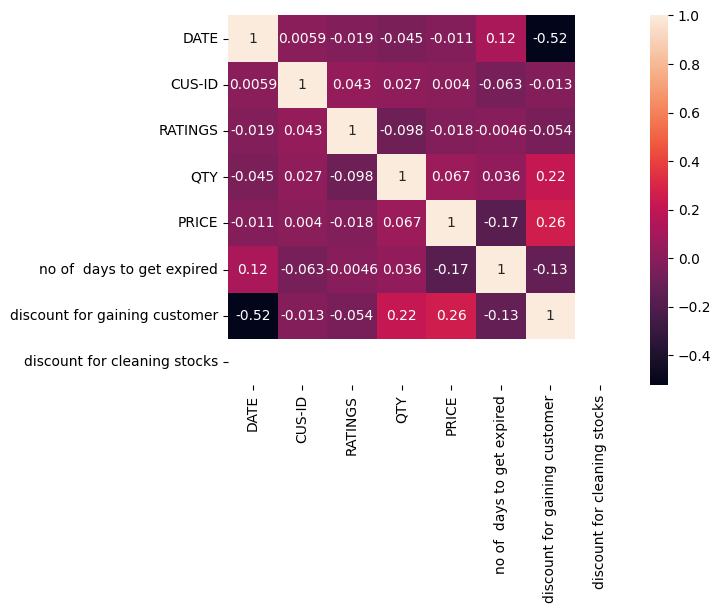

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=True)

In [ ]:
numeric_columns = copy_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = copy_final.select_dtypes(include=['object']).columns

In [ ]:
numeric_columns

Index(['CUS-ID', 'RATINGS', 'QTY', 'PRICE', 'no of  days to get expired',
       'discount for gaining customer', 'discount for cleaning stocks'],
      dtype='object')

In [ ]:
categorical_columns

Index(['ITEMS', 'CUS-NAME', 'reviews', 'UNITS'], dtype='object')

In [ ]:
correlation = copy_final[numeric_columns].corr()

                                 CUS-ID   RATINGS       QTY     PRICE  \
CUS-ID                         1.000000  0.043391  0.027139  0.003986   
RATINGS                        0.043391  1.000000 -0.098450 -0.018303   
QTY                            0.027139 -0.098450  1.000000  0.067230   
PRICE                          0.003986 -0.018303  0.067230  1.000000   
no of  days to get expired    -0.062993 -0.004585  0.035989 -0.174725   
discount for gaining customer -0.013226 -0.053908  0.215298  0.259188   
discount for cleaning stocks        NaN       NaN       NaN       NaN   

                               no of  days to get expired  \
CUS-ID                                          -0.062993   
RATINGS                                         -0.004585   
QTY                                              0.035989   
PRICE                                           -0.174725   
no of  days to get expired                       1.000000   
discount for gaining customer                   -

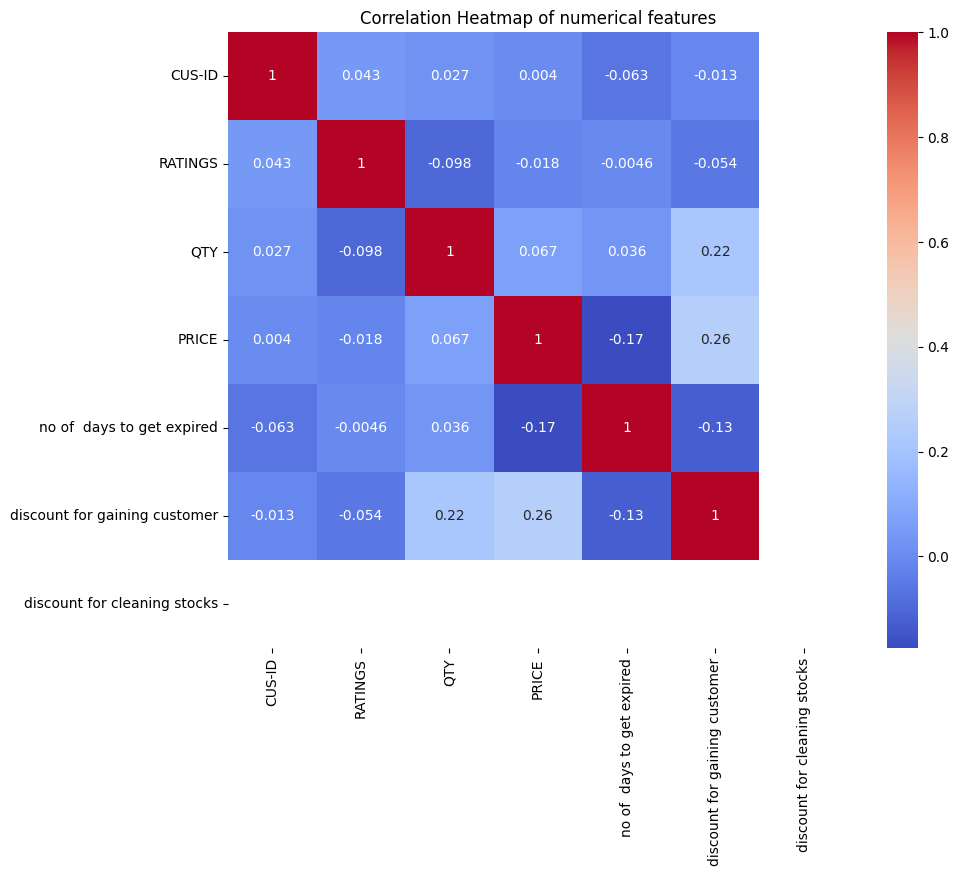

In [ ]:
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of numerical features')
plt.show()

In [ ]:
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(copy_final[col].value_counts())


Value counts for ITEMS:
ITEMS
MILK            43
CURD            43
turmeric        36
wheat           36
green gram      36
oil             36
pepper          36
salt            36
soap            36
chillipowder    36
biscuit         36
BISCUIT         23
HONEY           23
brinjal         23
milk            19
DHALL           19
OIL             19
TOOTH PASTE     18
RAGI            17
BUTTER          16
coriander       16
GHEE            16
APPLE           16
SALT            16
LEMON           16
TOMATO          15
LADIESFINGER    15
ORANGE          15
CHEESE          15
POTATO          15
RADISH          15
COOKIES         15
PEPPER          15
COCONUT OIL      4
dhall            4
orange           1
ghee             1
Name: count, dtype: int64

Value counts for CUS-NAME:
CUS-NAME
Unknown    457
EEE         54
MMM         36
AAA         33
VVV         31
BBB         25
UUU         23
div         19
DDD         16
SSS         12
HHH         12
KKK          6
RRR          6
QQQ     

In [ ]:
print("\nUnique values per column:")
for col in copy_final.columns:
    unique_values = copy_final[col].nunique()
    print(f"{col}: {unique_values}")


Unique values per column:
ITEMS: 37
DATE: 42
CUS-ID: 105
CUS-NAME: 30
reviews: 93
RATINGS: 9
QTY: 7
UNITS: 13
PRICE: 14
no of  days to get expired: 5
discount for gaining customer: 2
discount for cleaning stocks: 1


In [ ]:
avg_rating_per_item = copy_final.groupby('ITEMS')['RATINGS'].mean().sort_values(ascending=False)
print("\nAverage rating per item:")
print(avg_rating_per_item)


Average rating per item:
ITEMS
COOKIES         4.533333
ORANGE          4.400000
POTATO          4.266667
LADIESFINGER    4.000000
SALT            3.930441
MILK            3.776443
CURD            3.671792
RAGI            3.669827
CHEESE          3.633333
COCONUT OIL     3.625000
orange          3.500000
milk            3.447368
coriander       3.430441
salt            3.375000
pepper          3.375000
biscuit         3.375000
soap            3.375000
oil             3.375000
green gram      3.375000
turmeric        3.375000
chillipowder    3.375000
wheat           3.375000
RADISH          3.366667
TOOTH PASTE     3.361111
brinjal         3.347826
BISCUIT         3.347826
HONEY           3.347826
DHALL           3.178266
ghee            3.000000
BUTTER          3.000000
dhall           2.875000
OIL             2.783529
APPLE           2.774191
GHEE            2.680441
LEMON           2.468750
PEPPER          2.266667
TOMATO          2.066667
Name: RATINGS, dtype: float64


In [ ]:
avg_price_per_item = copy_final.groupby('ITEMS')['PRICE'].mean().sort_values(ascending=False)
print("\nAverage price per item:")
print(avg_price_per_item)


Average price per item:
ITEMS
APPLE           400.000000
ORANGE          350.000000
wheat           250.000000
GHEE            200.000000
CHEESE          120.000000
oil             120.000000
OIL             120.000000
DHALL            90.000000
brinjal          90.000000
BUTTER           80.000000
COCONUT OIL      80.000000
HONEY            80.000000
ghee             60.000000
dhall            52.500000
soap             50.000000
green gram       50.000000
coriander        50.000000
CURD             47.906977
orange           45.000000
RADISH           45.000000
milk             40.263158
TOMATO           40.000000
TOOTH PASTE      40.000000
MILK             40.000000
biscuit          30.000000
SALT             30.000000
BISCUIT          30.000000
POTATO           30.000000
LEMON            30.000000
salt             30.000000
COOKIES          30.000000
RAGI             30.000000
LADIESFINGER     28.000000
chillipowder     20.000000
PEPPER           20.000000
pepper           20.0000

In [ ]:
# Convert DATE to datetime if it's not already
copy_final['DATE'] = pd.to_datetime(copy_final['DATE'])

# Extract useful features
copy_final['Year'] = copy_final['DATE'].dt.year
copy_final['Month'] = copy_final['DATE'].dt.month
copy_final['Day'] = copy_final['DATE'].dt.day
copy_final['DayOfWeek'] = copy_final['DATE'].dt.dayofweek

# Now you can analyze patterns over time
sales_by_month = copy_final.groupby('Month')['PRICE'].sum()
print("\nTotal sales by month:")
print(sales_by_month)


Total sales by month:
Month
5     6829.0
6    17828.0
7    18073.0
8     4446.0
9    11649.0
Name: PRICE, dtype: float64


In [ ]:
copy_final.head()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks,Year,Month,Day,DayOfWeek
0,TOMATO,2024-05-11,4918,KKK,The store has good quality.,4.0,2.0,KG,40.0,5.000000,0.1,0.5,2024,5,11,5
1,DHALL,2024-05-21,1187,VVV,The store layout is easy to navigate.,3.0,3.0,KG,90.0,30.000000,0.1,0.5,2024,5,21,1
2,MILK,2024-05-21,1808,AAA,The produce is always fresh and well-stocked.,4.5,1.0,LITER,40.0,20.419426,0.1,0.5,2024,5,21,1
3,CURD,2024-05-21,2300,UUU,Prices are competitive and reasonable.,4.0,2.0,LITER,80.0,20.419426,0.1,0.5,2024,5,21,1
4,OIL,2024-05-21,2552,MMM,Love the friendly and helpful staff here.,3.0,2.0,LITER,120.0,30.000000,0.1,0.5,2024,5,21,1


In [ ]:
copy_final['total_revenue'] = copy_final['PRICE'] * copy_final['QTY']

In [ ]:
# prompt: generate total_transactions column and explain the code

copy_final['total_transactions'] = copy_final.groupby(['CUS-ID', 'CUS-NAME'])['total_revenue'].transform('count')


In [ ]:
copy_final.head()

,ITEMS,DATE,CUS-ID,CUS-NAME,reviews,RATINGS,QTY,UNITS,PRICE,no of days to get expired,discount for gaining customer,discount for cleaning stocks,Year,Month,Day,DayOfWeek,total_revenue,total_transactions
0,TOMATO,2024-05-11,4918,KKK,The store has good quality.,4.0,2.0,KG,40.0,5.000000,0.1,0.5,2024,5,11,5,80.0,3
1,DHALL,2024-05-21,1187,VVV,The store layout is easy to navigate.,3.0,3.0,KG,90.0,30.000000,0.1,0.5,2024,5,21,1,270.0,4
2,MILK,2024-05-21,1808,AAA,The produce is always fresh and well-stocked.,4.5,1.0,LITER,40.0,20.419426,0.1,0.5,2024,5,21,1,40.0,4
3,CURD,2024-05-21,2300,UUU,Prices are competitive and reasonable.,4.0,2.0,LITER,80.0,20.419426,0.1,0.5,2024,5,21,1,160.0,5
4,OIL,2024-05-21,2552,MMM,Love the friendly and helpful staff here.,3.0,2.0,LITER,120.0,30.000000,0.1,0.5,2024,5,21,1,240.0,4


In [ ]:
max_date = copy_final['DATE'].max()
data = copy_final.groupby('CUS-ID').agg(
    {
        'DATE': lambda x: (max_date - x.min()).days,
        'QTY': lambda x: x.sum(),
        'total_revenue': lambda x: x.sum(),
        'total_transactions': lambda x: len(x),
    })
data

,DATE,QTY,total_revenue,total_transactions
CUS-ID,,,,
1061,81,9.0,270.0,3
1088,114,3.0,90.0,3
1120,113,3.0,90.0,3
1187,116,12.0,1080.0,4
1199,80,6.0,720.0,3
...,...,...,...,...
4851,79,6.0,2400.0,3
4875,80,1500.0,120000.0,3
4918,126,6.0,240.0,3


In [ ]:
data.columns = ['age','quantity','total_revenue','total_transactions']
data[data['quantity']>0]
data.head()

,age,quantity,total_revenue,total_transactions
CUS-ID,,,,
1061,81,9.0,270.0,3
1088,114,3.0,90.0,3
1120,113,3.0,90.0,3
1187,116,12.0,1080.0,4
1199,80,6.0,720.0,3


In [ ]:
data['AOV'] = data['total_revenue'] / data['total_transactions']
data

,age,quantity,total_revenue,total_transactions,AOV
CUS-ID,,,,,
1061,81,9.0,270.0,3,90.0
1088,114,3.0,90.0,3,30.0
1120,113,3.0,90.0,3,30.0
1187,116,12.0,1080.0,4,270.0
1199,80,6.0,720.0,3,240.0
...,...,...,...,...,...
4851,79,6.0,2400.0,3,800.0
4875,80,1500.0,120000.0,3,40000.0
4918,126,6.0,240.0,3,80.0


In [ ]:
unique_customers = copy_df['CUS-ID'].nunique()
print("Number of unique customers:", unique_customers)
purchase_freq = data['total_transactions'].sum()/unique_customers
print("Average purchase frequency:", purchase_freq)

Number of unique customers: 105
Average purchase frequency: 7.59047619047619


In [ ]:
repeat_rate = data[data['total_transactions'] > 1].shape[0] / unique_customers
print("Repeat rate:", repeat_rate)

Repeat rate: 0.9809523809523809


In [ ]:
churn_rate = 1 - repeat_rate
print("Churn rate:", churn_rate)

Churn rate: 0.01904761904761909


In [ ]:
data['Proft_margin'] = data['total_revenue'] * .10
data

,age,quantity,total_revenue,total_transactions,AOV,Proft_margin
CUS-ID,,,,,,
1061,81,9.0,270.0,3,90.0,27.0
1088,114,3.0,90.0,3,30.0,9.0
1120,113,3.0,90.0,3,30.0,9.0
1187,116,12.0,1080.0,4,270.0,108.0
1199,80,6.0,720.0,3,240.0,72.0
...,...,...,...,...,...,...
4851,79,6.0,2400.0,3,800.0,240.0
4875,80,1500.0,120000.0,3,40000.0,12000.0
4918,126,6.0,240.0,3,80.0,24.0


In [ ]:
data['CLV'] = ((data['AOV']*purchase_freq)/churn_rate)*.10
data

,age,quantity,total_revenue,total_transactions,AOV,Proft_margin,CLV
CUS-ID,,,,,,,
1061,81,9.0,270.0,3,90.0,27.0,3586.5
1088,114,3.0,90.0,3,30.0,9.0,1195.5
1120,113,3.0,90.0,3,30.0,9.0,1195.5
1187,116,12.0,1080.0,4,270.0,108.0,10759.5
1199,80,6.0,720.0,3,240.0,72.0,9564.0
...,...,...,...,...,...,...,...
4851,79,6.0,2400.0,3,800.0,240.0,31880.0
4875,80,1500.0,120000.0,3,40000.0,12000.0,1594000.0
4918,126,6.0,240.0,3,80.0,24.0,3188.0


In [ ]:
print("the median CLV is: ",data['CLV'].median())
print("the average CLV is: ",data['CLV'].mean())

the median CLV is:  6375.999999999985
the average CLV is:  328827.6013690531


In [ ]:
data = data.sort_values(by='CLV').reset_index()
data

,CUS-ID,age,quantity,total_revenue,total_transactions,AOV,Proft_margin,CLV
0,3699,79,3.0,84.0,3,28.0,8.4,1115.8
1,4766,80,3.0,84.0,3,28.0,8.4,1115.8
2,2978,81,3.0,84.0,3,28.0,8.4,1115.8
3,4546,115,3.0,84.0,3,28.0,8.4,1115.8
4,4289,114,3.0,84.0,3,28.0,8.4,1115.8
...,...,...,...,...,...,...,...,...
100,4501,116,2000.0,400000.0,4,100000.0,40000.0,3985000.0
101,4272,113,1500.0,300000.0,3,100000.0,30000.0,3985000.0
102,4056,114,1500.0,300000.0,3,100000.0,30000.0,3985000.0
103,2022,79,1500.0,300000.0,3,100000.0,30000.0,3985000.0


In [ ]:
data1 = data.copy()

In [ ]:
data1.head()

,CUS-ID,age,quantity,total_revenue,total_transactions,AOV,Proft_margin,CLV
0,3699,79,3.0,84.0,3,28.0,8.4,1115.8
1,4766,80,3.0,84.0,3,28.0,8.4,1115.8
2,2978,81,3.0,84.0,3,28.0,8.4,1115.8
3,4546,115,3.0,84.0,3,28.0,8.4,1115.8
4,4289,114,3.0,84.0,3,28.0,8.4,1115.8


In [ ]:
data1.drop('CLV', axis=1, inplace=True)
data1

,CUS-ID,age,quantity,total_revenue,total_transactions,AOV,Proft_margin
0,3699,79,3.0,84.0,3,28.0,8.4
1,4766,80,3.0,84.0,3,28.0,8.4
2,2978,81,3.0,84.0,3,28.0,8.4
3,4546,115,3.0,84.0,3,28.0,8.4
4,4289,114,3.0,84.0,3,28.0,8.4
...,...,...,...,...,...,...,...
100,4501,116,2000.0,400000.0,4,100000.0,40000.0
101,4272,113,1500.0,300000.0,3,100000.0,30000.0
102,4056,114,1500.0,300000.0,3,100000.0,30000.0
103,2022,79,1500.0,300000.0,3,100000.0,30000.0


In [ ]:
customer_lifetime = 1/churn_rate
customer_lifetime

52.49999999999988

In [ ]:
clv = data1['AOV']*purchase_freq*customer_lifetime
clv

0         11158.0
1         11158.0
2         11158.0
3         11158.0
4         11158.0
          ...    
100    39850000.0
101    39850000.0
102    39850000.0
103    39850000.0
104    39850000.0
Name: AOV, Length: 105, dtype: float64

In [ ]:
data1['CLV1'] = clv
data1

,CUS-ID,age,quantity,total_revenue,total_transactions,AOV,Proft_margin,CLV1
0,3699,79,3.0,84.0,3,28.0,8.4,11158.0
1,4766,80,3.0,84.0,3,28.0,8.4,11158.0
2,2978,81,3.0,84.0,3,28.0,8.4,11158.0
3,4546,115,3.0,84.0,3,28.0,8.4,11158.0
4,4289,114,3.0,84.0,3,28.0,8.4,11158.0
...,...,...,...,...,...,...,...,...
100,4501,116,2000.0,400000.0,4,100000.0,40000.0,39850000.0
101,4272,113,1500.0,300000.0,3,100000.0,30000.0,39850000.0
102,4056,114,1500.0,300000.0,3,100000.0,30000.0,39850000.0
103,2022,79,1500.0,300000.0,3,100000.0,30000.0,39850000.0


In [ ]:
print("the median CLV is: ",data1['CLV1'].median())
print("the average CLV is: ",data1['CLV1'].mean())

the median CLV is:  63759.99999999985
the average CLV is:  3288276.013690531


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.express as px
# pd.options.display.float_format = '${:,.2f}'.format



# Load the data
data = pd.read_excel("./data/Online_Retail.xlsx")

# remove duplicate rows
filtered_data = data.drop_duplicates()

filtered_data.columns

# Plot the bar chart of countries
filtered_data.Country.value_counts()[:10].plot(kind='bar')

# Filter all quantities that are greater than zero
filtered_data = filtered_data[(filtered_data['Quantity']>0)]

# list(filtered_data.Country.unique())

filtered_data = filtered_data [['CustomerID','Description','InvoiceDate','InvoiceNo','Quantity','UnitPrice', 'Country']]

# Calculate total purchase
filtered_data['TotalPurchase'] = filtered_data['Quantity'] * filtered_data['UnitPrice']

filtered_data_group = filtered_data.groupby(['CustomerID','Country']).agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})


# Change the name of columns
filtered_data_group.columns=['num_days','num_transactions','num_units','spent_money']

# Average Order Value
filtered_data_group['avg_order_value'] = filtered_data_group['spent_money']/filtered_data_group['num_transactions']

# Calculate purchase frequency
purchase_frequency = sum(filtered_data_group['num_transactions'])/filtered_data_group.shape[0]

# Repeat rate
repeat_rate = round(filtered_data_group[filtered_data_group.num_transactions > 1].shape[0]/filtered_data_group.shape[0],2)

# Churn Percentage
churn_rate = round(1-repeat_rate,2)

filtered_data_group.reset_index()

filtered_data_group['profit_margin'] = filtered_data_group['spent_money']*0.05

# Customer Value
filtered_data_group['CLV'] = (filtered_data_group['avg_order_value']*purchase_frequency)/churn_rate

# Resetting the index
filtered_data_group.reset_index(inplace = True)

# Formatting the currency fields
# filtered_data_group['spent_money', 'avg_order_value','profit_margin'] = filtered_data_group.spent_money.apply(lambda x : "{:,}".format(x))

df_plot = filtered_data.groupby(['Country','Description','UnitPrice','Quantity']).agg({'TotalPurchase': 'sum'},{'Quantity':'sum'}).reset_index()
# df2 = df1.loc[df1['Country'] == 'USA']
# px.scatter(df_plot[:25000], x="UnitPrice", y="TotalPurchase", color = 'Quantity', size='Quantity',  title="Product Sales", size_max=20, log_y= True, log_x= True)
fig_UnitPriceVsQuantity = px.scatter(df_plot[:25000], x="UnitPrice", y="Quantity", color = 'Country',
        size='TotalPurchase',  size_max=20, log_y= True, log_x= True, title= "PURCHASE TREND ACROSS COUNTRIES")



# formating the float fields
var_float_filtered_group = [i for i in filtered_data_group.columns if filtered_data_group.dtypes[i]=='float64']
for i in var_float_filtered_group:
        filtered_data_group[i] = filtered_data_group[i].round(2)
        filtered_data_group[i].apply(lambda x : "{:,}".format(x))


var_float_filtered = [i for i in filtered_data.columns if filtered_data.dtypes[i]=='float64']
for i in var_float_filtered:
        filtered_data[i] = filtered_data[i].round(2)
        filtered_data[i].apply(lambda x : "{:,}".format(x))